In [55]:
iris = datasets.load_iris()
print(iris['feature_names']) # 所有的欄位名稱

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [56]:
x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
x = x[['sepal length (cm)', 'petal length (cm)']]
print('target_names: '+ str(iris['target_names'])) 
y = pd.DataFrame(iris['target'], columns=['target']) # target 是ANS(y)
y

target_names: ['setosa' 'versicolor' 'virginica']


,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [60]:
'''
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)',  'petal length (cm)']], iris_data[['target'], test_size=0.3])
'''

"\nfrom sklearn.model_selection import train_test_split\nx_train, x_test, y_train, y_test = train_test_split(iris_data[['sepal length (cm)',  'petal length (cm)']], iris_data[['target'], test_size=0.3])\n"

# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

1. 讀取資料&pre-processing
2. 切分訓練集與測試集 
3. 模型配適
4. 預測 
5. 評估(計算成績可能是誤差值或正確率或..)


In [2]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    
類別（class）：

    Iris Setosa 
    Iris Versicolour
    Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [3]:
iris = datasets.load_iris()
print(iris.DESCR) # 資料集說明

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print('-'*10, '印出iris的key值', '-'*10)
print(iris.keys())

print('-'*10, '檔案位置', '-'*10)

print(iris['filename']) # if 是電腦內的會有路徑

---------- 印出iris的key值 ----------
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
---------- 檔案位置 ----------
iris.csv


Recall:

字典概念 .目錄key可以對應其value值

data目錄

target目錄
...

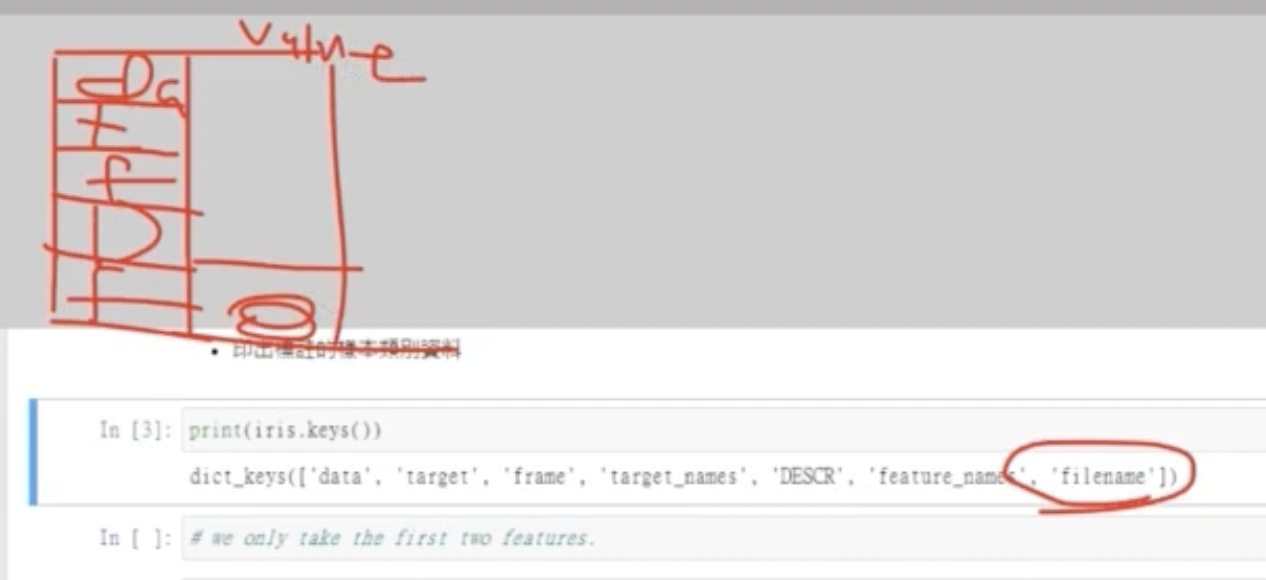

----- 查看前10筆資料、查看資料型別、印出標註的樣本類別資料 -----

In [5]:
print('-'*10, '查看前10筆資料', '-'*10)
print(iris.data[0:10]) 

print('-'*10, '查看資料型別', '-'*10)
print(type(iris.data))

print('-'*10, '印出標註的樣本類別資料', '-'*10)
print((iris.target)) # 樣本ANS資料 🌟變數值了

print('-'*10, '查看樣本名稱類別ANS', '-'*10)
print((iris.target_names)) 

---------- 查看前10筆資料 ----------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
---------- 查看資料型別 ----------
<class 'numpy.ndarray'>
---------- 印出標註的樣本類別資料 ----------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
---------- 查看樣本名稱類別ANS ----------
['setosa' 'versicolor' 'virginica']


iris data＆target需concat（ML時兩者需對應）, concat資料前 
先複習如何讀取需要的資料筆數

In [6]:
X = iris.data[:, :2] # we only take the first two features 只取前兩筆
# [row都要, 取兩個 col 的 index 0 & 1]
print(X.shape)

Y = iris.target
print(Y.shape) # 因為只有一個ANS

(150, 2)
(150,)


In [7]:
#X

In [8]:
#Y

pandas DataFrame concat需要有欄位名稱

x 組成 pandas DataFrame (也可以不用這種做)：

In [9]:
x = pd.DataFrame(iris.data, columns = iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


y 組成 pandas DataFrame：

In [10]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns = ['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [11]:
print('target_names:'+str(iris['target_names']))

target_names:['setosa' 'versicolor' 'virginica']


合併資料特徵欄位與目標欄位：

In [12]:
iris_data = pd.concat([x, y], axis = 1)
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


if 要取特定欄位可以用上面的X or 以下方式：

In [13]:
iris_data = pd.concat([x, y], axis = 1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


if 只選擇 target目標 為0與1的資料

In [14]:
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data
# Recall 原本是150筆（每類50）

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


In [15]:
print(iris['data'].size) # 查看資料量（4個欄位 X 150筆 = 600）

print(iris['data'].size/ len(iris['feature_names'])) 

600
150.0


## 切分訓練集與測試集
> train_test_split(X, Y, test_size = 0.3) # 0.3為舉例

In [16]:
from sklearn.model_selection import train_test_split
# 切分是有順序的！先 X 再 Y
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data[['target']], test_size = 0.3)
# [['target']]用成兩個list Y_train、test會有'target'標題, if 只有['target']：就沒標題

In [17]:
X_train.head() 

,sepal length (cm),petal length (cm)
46,5.1,1.6
2,4.7,1.3
89,5.5,4.0
83,6.0,5.1
17,5.1,1.4


In [18]:
X_train.shape

(70, 2)

In [19]:
X_test.head() # 在 test 的數據絕對不會在 training 出現, 🌟每執行一次結果都不同

,sepal length (cm),petal length (cm)
21,5.1,1.5
19,5.1,1.5
8,4.4,1.4
37,4.9,1.4
29,4.7,1.6


In [20]:
X_test.shape

(30, 2)

In [21]:
Y_train.head() 

,target
46,0
2,0
89,1
83,1
17,0


In [22]:
Y_test.head() 

,target
21,0
19,0
8,0
37,0
29,0


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

if 想建自己的方法 normalization 做正歸化：

In [23]:
# 前面一個一個 normalization 很麻煩, 把都要做的一起放進來一起 return 出來, 可以減少程式碼


def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

# stats 會去呼叫 return 那行函示
# df[c] 那行在做 z score, 且存成 pandas DataFrame 格式
def z_score(col, stats): 
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [24]:
stats = norm_stats(X_train) # X_train 做 norm_stats（normalize）, 先找到 stats
arr_x_train = np.array(z_score(X_train, stats)) # X_train ＆ stats資料 丟進 z_score
arr_x_train[0:10] # 顯示前10筆

/Users/wan-yunlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/wan-yunlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/wan-yunlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[-0.5199819 , -0.82225767],
       [-1.17581494, -1.03080128],
       [ 0.13585113,  0.84609122],
       [ 0.95564242,  1.61075113],
       [-0.5199819 , -0.96128674],
       [ 1.93939197,  1.26317845],
       [ 0.46376764,  0.49851854],
       [-0.68394016, -1.10031582],
       [ 0.46376764, -0.75274313],
       [-0.68394016, -0.89177221]])

In [25]:
arr_y_train = np.array(Y_train) # Y是答案 所以只會轉型態, 不會做其他調整 # 也轉成 numpy 再去 ML
# arr_y_train 

# if 今天在 training 有調整 那 test 也要做一樣的。⬆️ X_train 的部分改成 test 即可
stats = norm_stats(X_test) # X_train 做 norm_stats（normalize）, 先找到 stats
arr_X_test = np.array(z_score(X_test, stats)) # X_train ＆ stats資料 丟進 z_score
arr_X_test

/Users/wan-yunlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/wan-yunlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/wan-yunlee/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[-0.72575934, -1.07586883],
       [-0.72575934, -1.07586883],
       [-1.74864162, -1.14557956],
       [-1.01801142, -1.14557956],
       [-1.3102635 , -1.00615811],
       [ 1.9045094 ,  1.29429577],
       [ 1.02775315,  1.29429577],
       [ 0.73550107,  0.66689926],
       [-0.72575934, -0.03020798],
       [-0.72575934, -1.07586883],
       [-0.87188538, -1.14557956],
       [-1.01801142, -1.07586883],
       [ 1.61225732,  1.15487432],
       [ 0.00487087,  0.73660998],
       [ 0.29712295,  0.59718853],
       [ 1.32000523,  1.0851636 ],
       [ 0.00487087,  0.59718853],
       [ 0.88162711,  1.01545287],
       [ 1.17387919,  1.01545287],
       [ 0.29712295, -1.28500101],
       [-1.01801142, -1.14557956],
       [-0.28738121, -1.07586883],
       [-0.28738121,  1.01545287],
       [-0.87188538,  0.31834564],
       [-0.28738121, -0.93644739],
       [ 0.29712295,  0.73660998],
       [ 0.58937503,  1.01545287],
       [-1.16413746, -1.14557956],
       [ 2.05063544,

## use sklearn

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  # 把要的資料集丟進來做⬆️ norm_stats 的部分（算mean, std...） #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.41714286 2.78285714]
[0.60991134 1.43854802]


In [27]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train) # 丟進來即可做轉換（可check ANS會跟⬆️一樣）
X_train_std[:5]

array([[-0.5199819 , -0.82225767],
       [-1.17581494, -1.03080128],
       [ 0.13585113,  0.84609122],
       [ 0.95564242,  1.61075113],
       [-0.5199819 , -0.96128674]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:
train 轉成 test 可以執行（mean、std用同一個參數做的, if可接受還是可以用但要解釋）
一般是 train 跟 test 都根據自己的data做標準化

but scaler的算法是針對training 

結果會不對（可比較⬆️X_test ANS）

In [28]:
''' # 錯誤作法
X_test_std = sc.transform(X_test)
print(X_test_std[:10])
'''

' # 錯誤作法\nX_test_std = sc.transform(X_test)\nprint(X_test_std[:10])\n'

you can also use fit_transform method (i.e., fit and then transform)  
在 sklearn 可以直接🌟.fit_transform 一起做

In [29]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])

[[-0.72575934 -1.07586883]
 [-0.72575934 -1.07586883]
 [-1.74864162 -1.14557956]
 [-1.01801142 -1.14557956]
 [-1.3102635  -1.00615811]
 [ 1.9045094   1.29429577]
 [ 1.02775315  1.29429577]
 [ 0.73550107  0.66689926]
 [-0.72575934 -0.03020798]
 [-0.72575934 -1.07586883]]


In [30]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

# 標準化後的資料集的平均會=0
# 標準化後的資料集的標準差會=1
# so 資料所有特徵的數值會介在平均值=0, 標準差會=1的範圍

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.07831959363485
29.75284357180424


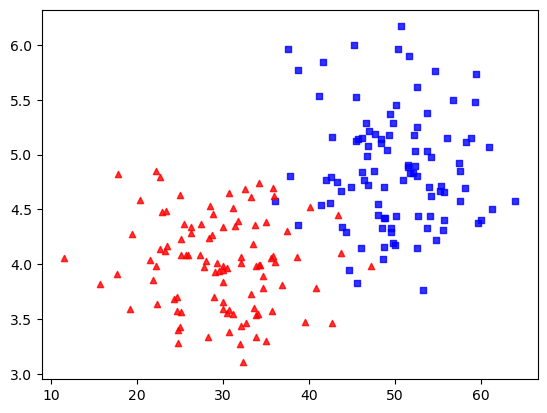

In [47]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [48]:
x_val = np.concatenate((x1,x2)) # x_value
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

方法一：自定義

In [49]:
# 寫一個函示要用的時候就可以調用
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [50]:
minmax_norm(x_val[:10])

array([0.12545787, 0.        , 0.56943004, 0.17850072, 0.45867734,
       1.        , 0.4027256 , 0.21397171, 0.14071259, 0.56014071])

方法二：sklearn

In [51]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape) # Recall 原本資料維度是一維, 200筆

(200,)


In [52]:
x_val=x_val.reshape(-1, 1) # MinMax需 1D => reshape 成二維 2D。1：再加一層
print(x_val.shape) 

(200, 1)


In [53]:
scaler = MinMaxScaler().fit(x_val)  # 轉會後的數值會在 default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)

[64.04577868]
[11.56315606]


In [54]:
print(scaler.transform(x_val)[:10]) # 都在0-1

[[0.63067048]
 [0.58947086]
 [0.7764683 ]
 [0.64808943]
 [0.74009777]
 [0.91786491]
 [0.72172355]
 [0.6597379 ]
 [0.63568004]
 [0.77341774]]


可以try load boston房價練習